In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:

data= pd.read_csv('water_potability.csv')

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.shape

(3276, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

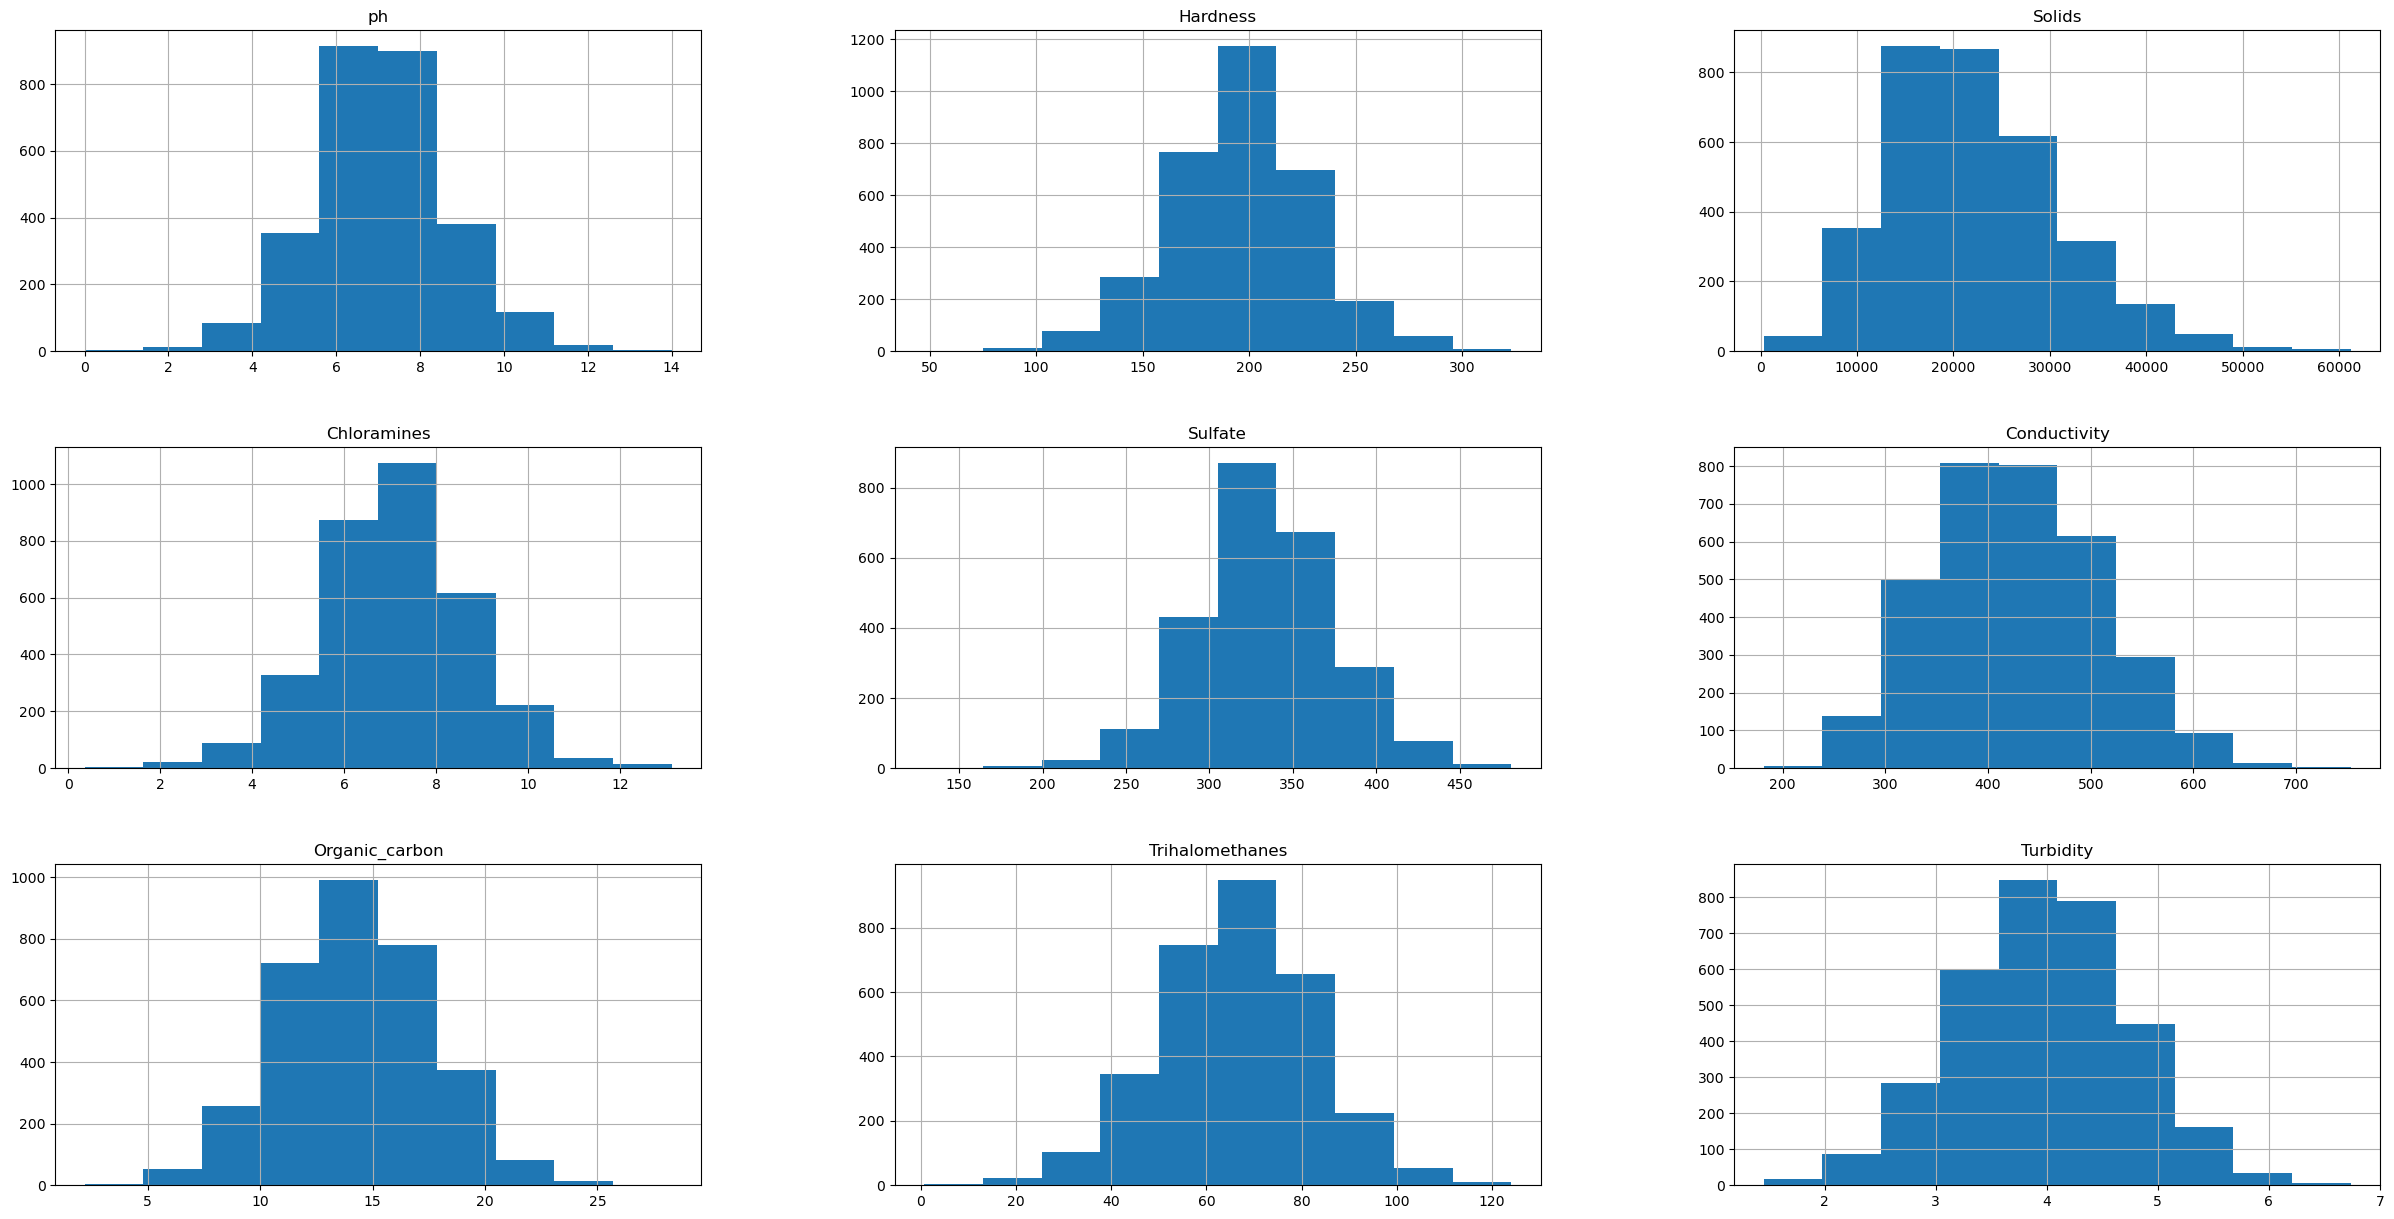

In [8]:
dgraph=data.select_dtypes(include=['float'])
dgraph.hist(figsize=(30,15))
plt.show()

In [9]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [10]:
data['Sulfate'] = data['Sulfate'].fillna(data['Sulfate'].median())
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
for i in['ph','Trihalomethanes']:
    data[i] = data[i].fillna(data[i].median())

In [12]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [13]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Text(0.5, 1.0, 'Boxplot of PH')

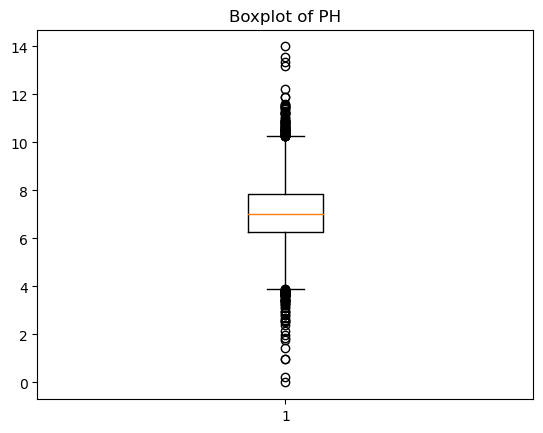

In [14]:

plt.boxplot(data['ph'])
plt.title('Boxplot of PH')

In [15]:
q1 = np.percentile(data['ph'],25,interpolation='midpoint')
q2=np.percentile(data['ph'],50,interpolation='midpoint')
q3=np.percentile(data['ph'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)

6.277602788378159
7.036752103833548
7.8703176409554345


C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\3575658831.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(data['ph'],25,interpolation='midpoint')
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\3575658831.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q2=np.percentile(data['ph'],50,interpolation='midpoint')
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\3575658831.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 

In [16]:
data['ph'].median()

7.036752103833548

In [17]:
iqr = q3-q1
low_limit = q1-(1.5*iqr)
up_limit = q3+(1.5*iqr)
print(low_limit)
print(up_limit)

3.888530509512246
10.259389919821349


In [18]:
outlier=[]
for x in data['ph']:
    if((x>up_limit)or(x,low_limit)):
        outlier.append(x)
outlier
    

[7.036752103833548,
 3.71608007538699,
 8.099124189298397,
 8.316765884214679,
 9.092223456290965,
 5.584086638456089,
 10.223862164528772,
 8.635848718500734,
 7.036752103833548,
 11.180284470721592,
 7.360640105838258,
 7.974521648923869,
 7.119824384264552,
 7.036752103833548,
 7.49623220797336,
 6.347271760539316,
 7.051785800016845,
 9.181560007151536,
 8.975464347533963,
 7.371050302429531,
 7.036752103833548,
 6.660212026118103,
 7.036752103833548,
 3.902475685915096,
 5.400301780729467,
 6.514415093251676,
 3.4450618643852127,
 7.036752103833548,
 7.036752103833548,
 7.036752103833548,
 7.181448580829175,
 9.82548990813439,
 10.43329098280438,
 7.414148196336244,
 7.036752103833548,
 5.115817063771218,
 3.641629777473381,
 5.618064405909149,
 7.036752103833548,
 9.267187530763549,
 7.036752103833548,
 5.331940479018537,
 7.145771545218821,
 9.920691058768153,
 4.758439424671477,
 5.702925976824722,
 6.953864225511059,
 10.68296642580598,
 7.036752103833548,
 8.757257397440991,


In [19]:
ind1=data['ph']>up_limit
data.loc[ind1].index

Int64Index([   9,   32,   47,   54,  125,  128,  204,  263,  278,  283,  317,
             376,  446,  469,  647,  725,  768,  783,  795,  805,  871,  886,
             908,  924,  935,  939,  957, 1023, 1155, 1158, 1162, 1164, 1227,
            1303, 1353, 1412, 1441, 1449, 1451, 2075, 2082, 2096, 2119, 2212,
            2230, 2263, 2280, 2282, 2336, 2478, 2512, 2586, 2646, 2670, 2868,
            2876, 2895, 2901, 2925, 2943, 2945, 2970, 2997, 3017, 3020, 3021,
            3060, 3078, 3081, 3108, 3142, 3233, 3246, 3249, 3269],
           dtype='int64')

In [20]:
data.drop([ 9,   32,   47,   54,  125,  128,  204,  263,  278,  283,  317,
             376,  446,  469,  647,  725,  768,  783,  795,  805,  871,  886,
             908,  924,  935,  939,  957, 1023, 1155, 1158, 1162, 1164, 1227,
            1303, 1353, 1412, 1441, 1449, 1451, 2075, 2082, 2096, 2119, 2212,
            2230, 2263, 2280, 2282, 2336, 2478, 2512, 2586, 2646, 2670, 2868,
            2876, 2895, 2901, 2925, 2943, 2945, 2970, 2997, 3017, 3020, 3021,
            3060, 3078, 3081, 3108, 3142, 3233, 3246, 3249, 3269],inplace=True)


Text(0.5, 1.0, 'Boxplot of ph')

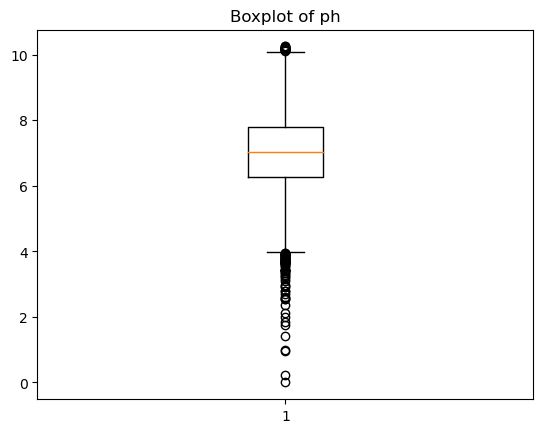

In [21]:
plt.boxplot(data['ph'])
plt.title('Boxplot of ph')

Text(0.5, 1.0, 'Boxplot of Hardness')

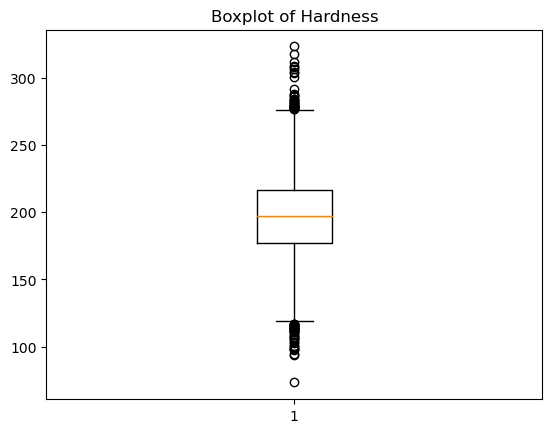

In [22]:
plt.boxplot(data['Hardness'])
plt.title('Boxplot of Hardness')


In [23]:
q1 = np.percentile(data['Hardness'],25,interpolation='midpoint')
q2 = np.percentile(data['Hardness'],50,interpolation='midpoint')
q3 = np.percentile(data['Hardness'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)

177.09531249174174
197.0499653137216
216.61247489358416


C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\1693076762.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(data['Hardness'],25,interpolation='midpoint')
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\1693076762.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q2 = np.percentile(data['Hardness'],50,interpolation='midpoint')
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\1693076762.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the mod

In [24]:
data['Hardness'].median()

197.0499653137216

In [25]:
iqr=q3-q1
low_limit=q1-(1.58*iqr)
up_limit=q3+(1.5*iqr)
print(low_limit)
print(up_limit)

114.6581958968307
275.8882184963478


In [26]:
outlier=[]
for x in data['Hardness']:
    if((x>up_limit)or(x<low_limit)):
        outlier.append(x)
outlier        


[279.3571667700924,
 304.23591211231667,
 100.4576150915831,
 103.46475866009456,
 300.29247579584023,
 104.75242498882724,
 281.2686670205161,
 278.0563209975309,
 284.09835153725896,
 112.29948548284678,
 105.85926357195498,
 276.7335689074048,
 112.82025397576253,
 103.17358697810718,
 98.7716435320576,
 280.08241070652804,
 278.5851051769885,
 280.08965491445105,
 113.8311121743512,
 307.70602408798766,
 94.0913074831264,
 282.73901696086256,
 278.1475240565239,
 323.124,
 311.38395647301763,
 291.4618973983503,
 73.4922336890611,
 308.2538329449222,
 281.58216230439865,
 286.2017632826901,
 306.6274814200808,
 108.69907681469638,
 287.370208188522,
 106.3801125414636,
 97.28090859780744,
 283.9972840772543,
 98.45293050958628,
 279.2324186459543,
 107.3833271231581,
 277.1169457168408,
 113.5046982156932,
 110.86578832349096,
 278.3403577852462,
 281.59423489402064,
 108.91662923953172,
 283.4095680437513,
 100.80651972166484,
 107.34198187869087,
 111.2464115966342,
 278.08144633

In [27]:
ind1=data['Hardness']>up_limit
data.loc[ind1].index

Int64Index([  18,   37,   88,  156,  180,  187,  218,  260,  262,  275,  321,
             342,  346,  347,  354,  366,  383,  398,  405, 1490, 1535, 1564,
            1725, 1777, 1989, 2012, 2290, 2508, 2630, 2632, 2669, 2818, 2861,
            3218, 3221, 3244],
           dtype='int64')

In [28]:
data.drop([ 18,   37,   88,  156,  180,  187,  218,  260,  262,  275,  321,
             342,  346,  347,  354,  366,  383,  398,  405, 1490, 1535, 1564,
            1725, 1777, 1989, 2012, 2290, 2508, 2630, 2632, 2669, 2818, 2861,
            3218, 3221, 3244],inplace=True)

Text(0.5, 1.0, 'Boxplot of Hardness')

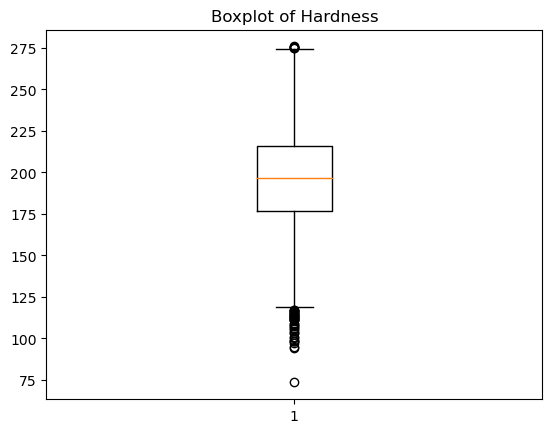

In [29]:
plt.boxplot(data['Hardness'])
plt.title('Boxplot of Hardness')

Text(0.5, 1.0, 'Boxplot of Solids')

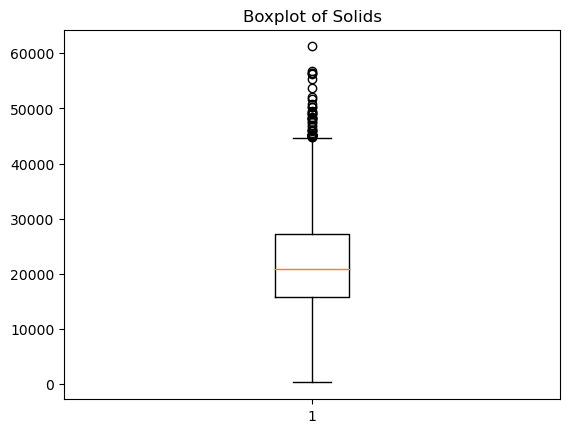

In [30]:
plt.boxplot(data['Solids'])
plt.title('Boxplot of Solids')


In [31]:
q1 = np.percentile(data['Solids'],25,interpolation='midpoint')
q2 = np.percentile(data['Solids'],50,interpolation='midpoint')
q3 = np.percentile(data['Solids'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)

15736.580985502496
20933.512749666126
27310.060847941597


C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\1729962077.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(data['Solids'],25,interpolation='midpoint')
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\1729962077.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q2 = np.percentile(data['Solids'],50,interpolation='midpoint')
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\1729962077.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes '

In [32]:
data['Solids'].median()

20933.512749666126

In [33]:
outlier=[]
for x in data['Solids']:
    if((x>up_limit)or(x<low_limit)):
        outlier.append(x)

In [34]:
outlier

[20791.318980747023,
 18630.057857970347,
 19909.541732292397,
 22018.41744077529,
 17978.98633892625,
 28748.68773904612,
 28749.716543528237,
 13672.091763901635,
 14285.583854224516,
 32452.614409143884,
 18767.65668181348,
 18730.813653342717,
 27331.36196192776,
 28388.00488673697,
 41065.23476453935,
 30980.600786788866,
 24041.32628006128,
 25630.320036999725,
 22305.56741374141,
 30944.363591242687,
 17107.224225827616,
 21167.50009896877,
 17266.593421923077,
 21218.702871190195,
 33424.7686784948,
 13224.935638976958,
 26362.965012309312,
 15193.41347396722,
 15196.229987483845,
 19677.892465552013,
 32555.85253707369,
 14787.206264858174,
 19620.545328612152,
 24752.072459755404,
 19942.27321818484,
 24683.723566029654,
 11703.923907047854,
 16658.876503163574,
 28780.340431632725,
 9973.934059208535,
 21568.428779035887,
 35606.44017680798,
 10575.18628088936,
 34415.853145873094,
 21536.22468744541,
 27492.30730658781,
 12013.550628764531,
 19871.788448305862,
 11920.61083

In [35]:
ind1=data['Solids']>up_limit
data.loc[ind1].index


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,   10,
            ...
            3265, 3266, 3267, 3268, 3270, 3271, 3272, 3273, 3274, 3275],
           dtype='int64', length=3165)

In [36]:
A=data.loc[ind1].index
print(A)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,   10,
            ...
            3265, 3266, 3267, 3268, 3270, 3271, 3272, 3273, 3274, 3275],
           dtype='int64', length=3165)


In [37]:
df=pd.DataFrame(A)
df

,0
0,0
1,1
2,2
3,3
4,4
...,...
3160,3271
3161,3272
3162,3273
3163,3274


Text(0.5, 1.0, 'Boxplot of Chloramines')

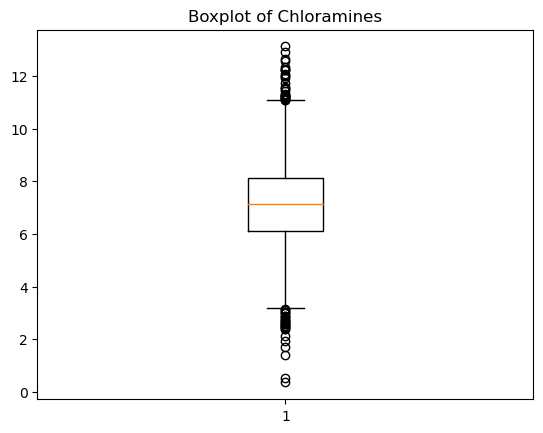

In [38]:
plt.boxplot(data['Chloramines'])
plt.title('Boxplot of Chloramines')

In [39]:
q1 = np.percentile(data['Chloramines'],25,interpolation="midpoint")
q2 = np.percentile(data['Chloramines'],50,interpolation='midpoint')
q3 = np.percentile(data['Chloramines'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)


6.125585211067605
7.121477448104934
8.109345860796047


C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\1081017101.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(data['Chloramines'],25,interpolation="midpoint")
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\1081017101.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q2 = np.percentile(data['Chloramines'],50,interpolation='midpoint')
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\1081017101.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of t

In [40]:
data['Chloramines'].median()

7.121477448104934

In [41]:
iqr=q3-q1
low_limit=q1-(1.5*iqr)
up_limit=q3+(1.5*iqr)
print(low_limit)
print(up_limit)



3.1499442364749424
11.08498683538871


In [42]:
outlier=[]
for x in data['Chloramines']:
    if((x>up_limit)or(x<low_limit)):
        outlier.append(x)
outlier


[12.580026491367864,
 0.5303512946996154,
 12.912186637308174,
 12.36328482531005,
 11.1707886197812,
 13.127000000000002,
 2.4843799772443687,
 12.062536203606816,
 2.9813789663386965,
 2.9937440607391426,
 11.586151077767036,
 1.6839925807280034,
 11.5431904716461,
 11.208688337573191,
 11.251507349038166,
 2.7508373088106506,
 2.577555273054553,
 11.523597512651357,
 12.279374176513643,
 2.8660730298495407,
 2.862535374452988,
 11.30283118849055,
 11.086526251113613,
 2.7417121173046723,
 11.14310959304401,
 11.129153658303936,
 2.4560135962074776,
 3.139552657761377,
 2.62126755562118,
 11.264385849612266,
 11.240000442635736,
 2.458609195210029,
 11.75390365748002,
 2.4985967213169733,
 0.3520000000000003,
 3.117440980065026,
 11.101628109872705,
 2.855789795310306,
 1.3908709048851806,
 2.39798498956576,
 11.994290224518096,
 11.448469328247167,
 1.92027144925428,
 12.24639409776954,
 12.227175278872044,
 11.930447965564245,
 2.3866534943935944,
 2.1026909914982523,
 3.1248325554

In [43]:
ind1 = data['Chloramines']>up_limit
data.loc[ind1].index

Int64Index([ 272,  287,  304,  324,  351,  434,  456,  534,  549,  608,  738,
             757,  814, 1057, 1192, 1537, 2110, 2138, 2249, 2344, 2370, 2395,
            2424, 2446, 2447, 2562, 2613, 2694, 2699],
           dtype='int64')

In [44]:
data.drop([272,  287,  304,  324,  351,  434,  456,  534,  549,  608,  738,
             757,  814, 1057, 1192, 1537, 2110, 2138, 2249, 2344, 2370, 2395,
            2424, 2446, 2447, 2562, 2613, 2694, 2699],inplace = True)

Text(0.5, 1.0, 'Chloramines')

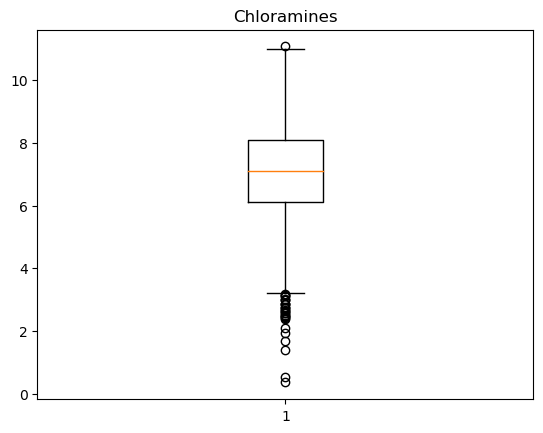

In [45]:
plt.boxplot(data['Chloramines'])
plt.title("Chloramines")

Text(0.5, 1.0, 'Boxplot of Sulfate')

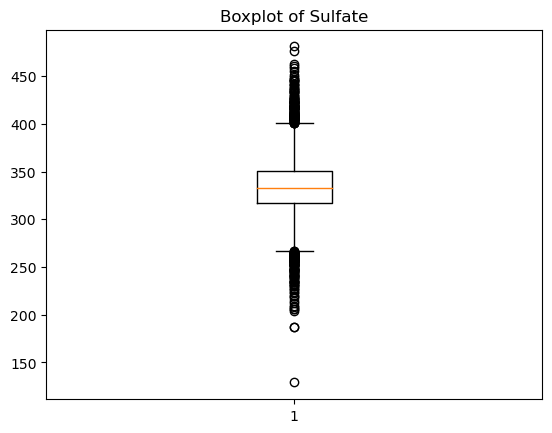

In [46]:
plt.boxplot(data['Sulfate'])
plt.title('Boxplot of Sulfate')

In [47]:
q1 = np.percentile(data['Sulfate'],25,interpolation='midpoint')
q2 = np.percentile(data['Sulfate'],50,interpolation='midpoint')
q3 = np.percentile(data['Sulfate'],75,interpolation='midpoint')

print(q1)
print(q2)
print(q3)

316.9662463157422
333.073545745888
350.4381164971463


C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\2568367105.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(data['Sulfate'],25,interpolation='midpoint')
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\2568367105.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q2 = np.percentile(data['Sulfate'],50,interpolation='midpoint')
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\2568367105.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes

In [48]:
data['Sulfate'].median()

333.073545745888

In [49]:
iqr = q3-q1
low_limit=q1-(1.5*iqr)
up_limit=q2-(1.5*iqr)
print(low_limit)
print(up_limit)

266.75844104363597
282.8657404737818


In [50]:
outlier=[]
for x in data['Sulfate']:
    if((x>up_limit)or(x<low_limit)):
        outlier.append(x)
outlier

[368.51644134980336,
 333.073545745888,
 333.073545745888,
 356.88613564305666,
 310.13573752420444,
 326.6783629116736,
 393.66339551509645,
 303.3097711592812,
 326.62435345560164,
 333.073545745888,
 299.41578134685847,
 333.073545745888,
 364.4876872467604,
 333.073545745888,
 398.3505168222779,
 335.75443859606526,
 333.073545745888,
 310.93085831787846,
 326.943977743867,
 333.073545745888,
 328.3582406986835,
 323.5963490101317,
 384.0070058017212,
 304.0019927974152,
 395.3894903418456,
 307.01179262256534,
 338.3364310774872,
 333.073545745888,
 387.1753164773568,
 333.073545745888,
 323.8363839136296,
 286.0595560492713,
 333.073545745888,
 328.0775332014693,
 309.03932035276006,
 316.6751618281669,
 385.9756504867898,
 337.35052910963714,
 333.073545745888,
 333.073545745888,
 315.60659440039234,
 304.5352242338838,
 317.88290049783706,
 299.8204779108216,
 247.2008260476431,
 288.0521917368515,
 339.7519188007938,
 333.073545745888,
 381.6493228718946,
 324.8930378422557,
 

In [51]:
ind1=data["Sulfate"]>up_limit
data.loc[ind1].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,   10,   11,
            ...
            3265, 3266, 3267, 3268, 3270, 3271, 3272, 3273, 3274, 3275],
           dtype='int64', length=2901)

In [52]:
b=data.loc[ind1].index
print(b)


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,   10,   11,
            ...
            3265, 3266, 3267, 3268, 3270, 3271, 3272, 3273, 3274, 3275],
           dtype='int64', length=2901)


In [53]:
df=pd.DataFrame(b)
df

,0
0,0
1,1
2,2
3,3
4,4
...,...
2896,3271
2897,3272
2898,3273
2899,3274


In [54]:
data.drop([0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 126, 127, 129, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183, 185, 186, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 200, 201, 202, 203, 205, 207, 208, 209, 210, 211, 212, 213, 214, 215, 217, 219, 220, 221, 223, 224, 225, 226, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 254, 255, 256, 257, 258, 259, 264, 265, 266, 267, 269, 271, 273, 274, 276, 277, 279, 280, 282, 285, 286, 290, 291, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 305, 306, 307, 308, 309, 311, 312, 313, 315, 316, 318, 319, 320, 323, 325, 326, 327, 328, 329, 330, 331, 332, 334, 335, 336, 337, 338, 339, 340, 343, 344, 345, 348, 349, 350, 352, 353, 355, 356, 358, 359, 360, 361, 362, 363, 364, 367, 368, 369, 370, 371, 373, 374, 375, 377, 378, 379, 381, 384, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 399, 401, 402, 403, 404, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 447, 448, 449, 450, 451, 452, 453, 454, 455, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 535, 536, 537, 538, 539, 540, 541, 542, 544, 545, 546, 547, 548, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 671, 672, 673, 674, 675, 677, 678, 679, 681, 682, 683, 684, 685, 686, 687, 688, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 705, 706, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 726, 727, 729, 730, 731, 732, 733, 734, 735, 736, 737, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 758, 760, 761, 762, 763, 764, 765, 766, 767, 769, 770, 771, 772, 773, 774, 775, 776, 778, 779, 780, 781, 784, 787, 788, 789, 790, 791, 792, 794, 796, 797, 798, 799, 800, 801, 804, 806, 808, 809, 810, 811, 812, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 936, 937, 938, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1074, 1075, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1097, 1100, 1101, 1102, 1103, 1104, 1105, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1115, 1116, 1117, 1118, 1120, 1121, 1122, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1156, 1157, 1159, 1160, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1182, 1183, 1184, 1185, 1187, 1188, 1190, 1191, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1207, 1208, 1209, 1210, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1228, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1298, 1299, 1300, 1301, 1302, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1319, 1320, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1342, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1362, 1363, 1364, 1365, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1411, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1442, 1443, 1444, 1446, 1447, 1448, 1450, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1524, 1525, 1526, 1528, 1530, 1532, 1533, 1534, 1536, 1539, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1549, 1550, 1551, 1552, 1553, 1555, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1614, 1615, 1616, 1617, 1618, 1620, 1621, 1622, 1623, 1624, 1626, 1627, 1628, 1629, 1630, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1657, 1658, 1659, 1660, 1661, 1663, 1664, 1665, 1666, 1667, 1668, 1670, 1671, 1672, 1673, 1674, 1675, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1726, 1727, 1728, 1730, 1731, 1732, 1733, 1734, 1735, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1772, 1773, 1774, 1775, 1776, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1799, 1800, 1801, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1827, 1828, 1829, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1861, 1862, 1863, 1865, 1866, 1867, 1868, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1879, 1880, 1882, 1883, 1884, 1885, 1887, 1888, 1889, 1890, 1892, 1893, 1894, 1896, 1898, 1899, 1900, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1936, 1937, 1938, 1939, 1940, 1941, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1980, 1981, 1983, 1984, 1985, 1986, 1987, 1988, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2014, 2015, 2016, 2017, 2018, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2032, 2033, 2034, 2035, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2074, 2076, 2077, 2078, 2080, 2081, 2083, 2084, 2085, 2086, 2088, 2089, 2090, 2092, 2093, 2094, 2095, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2111, 2112, 2113, 2114, 2116, 2117, 2118, 2121, 2122, 2123, 2124, 2126, 2127, 2128, 2130, 2131, 2132, 2133, 2135, 2136, 2137, 2139, 2141, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2154, 2156, 2159, 2160, 2161, 2162, 2163, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2182, 2183, 2185, 2186, 2187, 2188, 2189, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2199, 2200, 2201, 2202, 2203, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239, 2240, 2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2250, 2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2264, 2265, 2266, 2267, 2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278, 2279, 2281, 2283, 2284, 2285, 2286, 2287, 2288, 2289, 2291, 2292, 2293, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2303, 2304, 2305, 2306, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2318, 2319, 2320, 2321, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331, 2332, 2333, 2334, 2335, 2338, 2339, 2340, 2341, 2342, 2343, 2345, 2346, 2347, 2348, 2349, 2351, 2352, 2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362, 2363, 2364, 2365, 2366, 2367, 2368, 2369, 2371, 2372, 2374, 2375, 2376, 2377, 2378, 2379, 2380, 2381, 2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2397, 2398, 2399, 2400, 2401, 2402, 2403, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2411, 2412, 2413, 2414, 2415, 2417, 2418, 2419, 2421, 2422, 2423, 2425, 2426, 2427, 2429, 2430, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2439, 2440, 2441, 2442, 2443, 2444, 2445, 2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2476, 2477, 2479, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2509, 2510, 2511, 2513, 2514, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 2560, 2561, 2563, 2564, 2565, 2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2585, 2587, 2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2614, 2615, 2616, 2617, 2618, 2619, 2620, 2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2631, 2633, 2634, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644, 2645, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2671, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683, 2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2695, 2696, 2697, 2698, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2720, 2721, 2722, 2723, 2724, 2725, 2726, 2727, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2767, 2769, 2771, 2772, 2774, 2775, 2776, 2777, 2778, 2780, 2781, 2782, 2783, 2784, 2786, 2787, 2788, 2789, 2790, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2807, 2808, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2819, 2820, 2821, 2822, 2823, 2825, 2826, 2827, 2828, 2829, 2830, 2831, 2833, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2846, 2847, 2848, 2849, 2850, 2852, 2853, 2854, 2855, 2856, 2858, 2859, 2860, 2862, 2863, 2864, 2865, 2866, 2867, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2877, 2878, 2879, 2881, 2882, 2884, 2885, 2886, 2888, 2889, 2890, 2891, 2892, 2893, 2894, 2896, 2897, 2898, 2899, 2900, 2903, 2904, 2905, 2906, 2907, 2909, 2910, 2911, 2912, 2913, 2914, 2916, 2917, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2926, 2927, 2928, 2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2937, 2938, 2939, 2940, 2944, 2947, 2948, 2949, 2950, 2951, 2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967, 2968, 2969, 2971, 2972, 2973, 2974, 2975, 2977, 2978, 2979, 2980, 2981, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2998, 2999, 3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3019, 3022, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3054, 3055, 3056, 3057, 3058, 3059, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3076, 3077, 3079, 3080, 3083, 3084, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3163, 3164, 3165, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3173, 3174, 3175, 3177, 3178, 3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199, 3200, 3201, 3202, 3203, 3204, 3205, 3206, 3208, 3209, 3210, 3211, 3212, 3213, 3214, 3215, 3216, 3217, 3219, 3220, 3222, 3223, 3224, 3225, 3226, 3227, 3228, 3229, 3230, 3231, 3232, 3234, 3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3245, 3247, 3248, 3250, 3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258, 3259, 3260, 3261, 3262, 3263, 3264, 3265, 3266, 3267, 3268, 3270, 3271, 3272, 3273, 3274, 3275],inplace=True)

Text(0.5, 1.0, 'Boxplot of Sulfate')

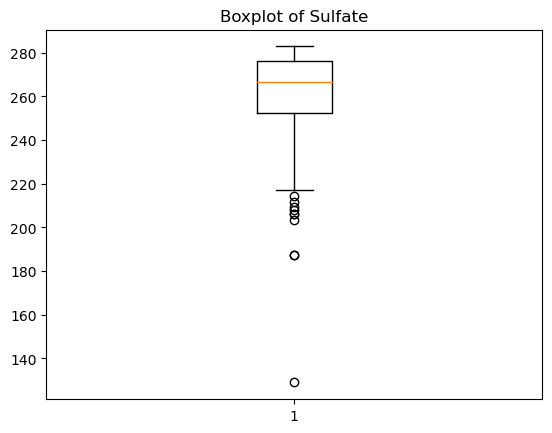

In [55]:
plt.boxplot(data['Sulfate'])
plt.title("Boxplot of Sulfate")

Text(0.5, 1.0, ' Box plot of Conductivity')

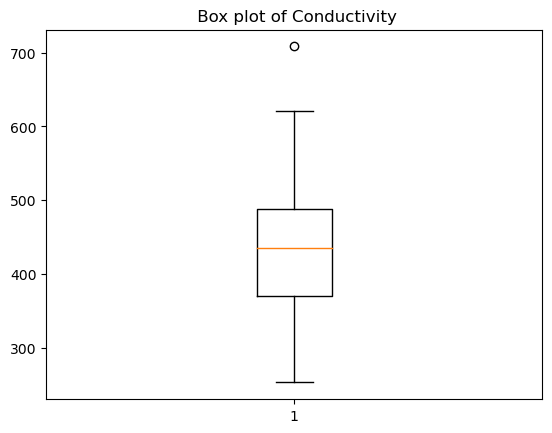

In [56]:
plt.boxplot(data['Conductivity'])
plt.title(' Box plot of Conductivity')

In [57]:
q1 = np.percentile(data['Conductivity'],25,
                   interpolation='midpoint')
q2 = np.percentile(data['Conductivity'],50,
                   interpolation='midpoint')
q3 = np.percentile(data['Conductivity'],75,
                   interpolation='midpoint')
iqr = q3-q1
low_limit = q1-1.5*iqr
up_limit = q3+1.5*iqr
print(low_limit)
print(up_limit)


193.334895018924
664.4263111326707


C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\1570934052.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(data['Conductivity'],25,
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\1570934052.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q2 = np.percentile(data['Conductivity'],50,
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\1570934052.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpo

In [58]:
outlier = []
for x in data['Conductivity']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)
outlier

[708.2263644667531]

In [59]:
ind1 = data['Conductivity']>up_limit
data.loc[ind1].index

Int64Index([2134], dtype='int64')

In [60]:
data.drop([2134],inplace = True)

Text(0.5, 1.0, 'Box plot of Conductivity')

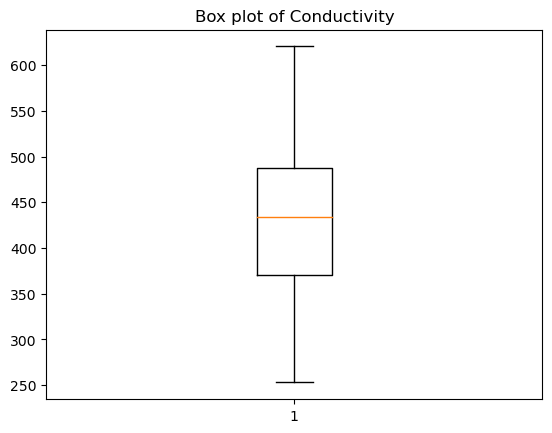

In [61]:
plt.boxplot(data['Conductivity'])
plt.title('Box plot of Conductivity')

Text(0.5, 1.0, ' Box plot of Organic_carbon')

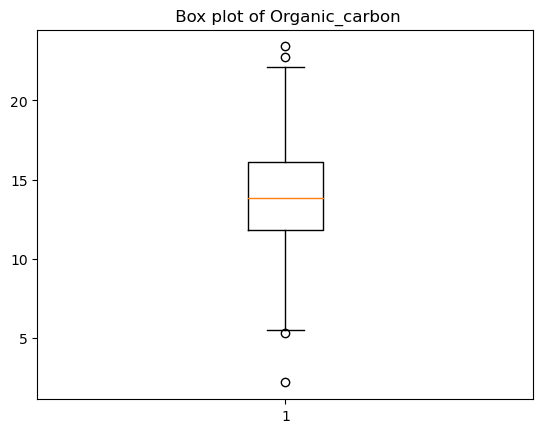

In [62]:
plt.boxplot(data['Organic_carbon'])
plt.title(' Box plot of Organic_carbon')

In [63]:
q1 = np.percentile(data['Organic_carbon'],25,
                   interpolation='midpoint')
q2 = np.percentile(data['Organic_carbon'],50,
                   interpolation='midpoint')
q3 = np.percentile(data['Organic_carbon'],75,
                   interpolation='midpoint')
iqr = q3-q1
low_limit = q1-1.5*iqr
up_limit = q3+1.5*iqr
print(low_limit)
print(up_limit)

5.425671149757164
22.476227442359487


C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\1682377942.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(data['Organic_carbon'],25,
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\1682377942.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q2 = np.percentile(data['Organic_carbon'],50,
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\1682377942.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'm

In [64]:
outlier = []
for x in data['Organic_carbon']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)
outlier


[23.39951606024522, 5.315286537158272, 2.1999999999999886, 22.763707419363584]

In [65]:
ind1 = data['Organic_carbon']>up_limit
data.loc[ind1].index

Int64Index([227, 1366], dtype='int64')

In [66]:
data.drop([227,1366],
           inplace = True)

Text(0.5, 1.0, 'Box plot of Organic_carbon')

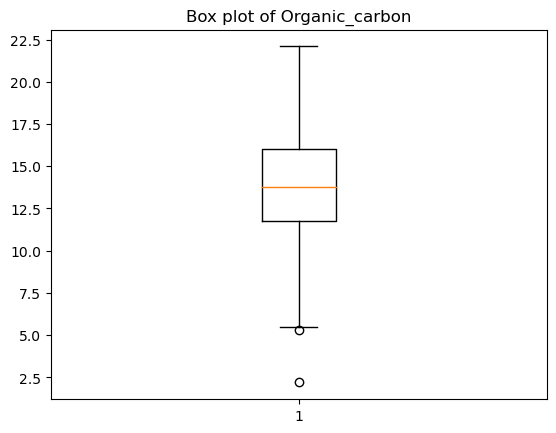

In [67]:
plt.boxplot(data['Organic_carbon'])
plt.title('Box plot of Organic_carbon')

Text(0.5, 1.0, ' Box plot of Trihalomethanes')

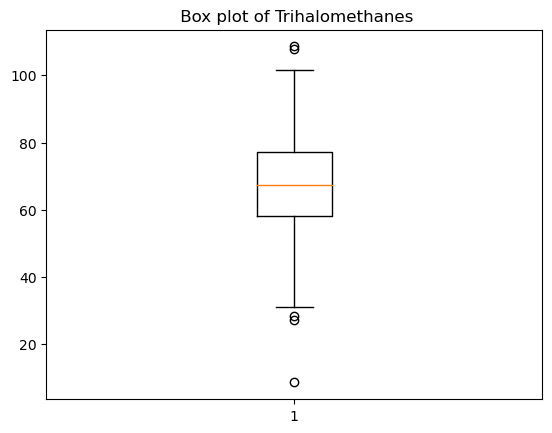

In [68]:
plt.boxplot(data['Trihalomethanes'])
plt.title(' Box plot of Trihalomethanes')

In [69]:
q1 = np.percentile(data['Trihalomethanes'],25,
                   interpolation='midpoint')
q2 = np.percentile(data['Trihalomethanes'],50,
                   interpolation='midpoint')
q3 = np.percentile(data['Trihalomethanes'],75,
                   interpolation='midpoint')
iqr = q3-q1
low_limit = q1-1.5*iqr
up_limit = q3+1.5*iqr
print(low_limit)
print(up_limit)

29.105087630683986
106.12590464908823


C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\2164367293.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(data['Trihalomethanes'],25,
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\2164367293.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q2 = np.percentile(data['Trihalomethanes'],50,
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\2164367293.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 

In [70]:
outlier = []
for x in data['Trihalomethanes']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)
outlier

[107.75404263860524,
 8.577012932983806,
 27.09570289768941,
 108.58941437566844,
 28.400877340105264]

In [71]:
ind1 = data['Trihalomethanes']>up_limit
data.loc[ind1].index

Int64Index([284, 1864], dtype='int64')

In [72]:
data.drop([284,1864],
           inplace = True)

Text(0.5, 1.0, 'Box plot of Trihalomethanes')

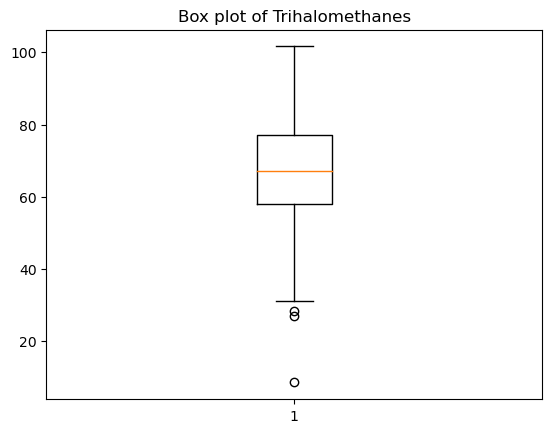

In [73]:
plt.boxplot(data['Trihalomethanes'])
plt.title('Box plot of Trihalomethanes')

Text(0.5, 1.0, ' Box plot of Turbidity ')

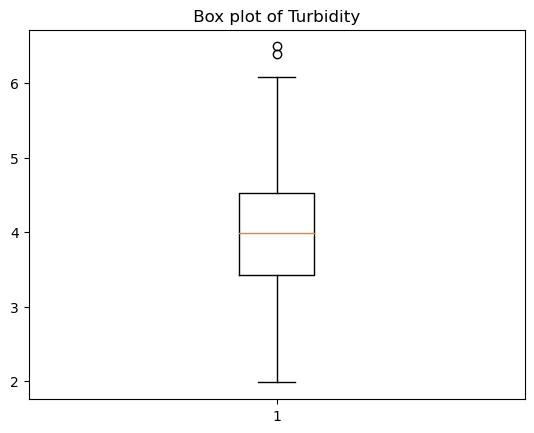

In [74]:
plt.boxplot(data['Turbidity'])
plt.title(' Box plot of Turbidity ')

In [75]:
q1 = np.percentile(data['Turbidity'],25,
                   interpolation='midpoint')
q2 = np.percentile(data['Turbidity'],50,
                   interpolation='midpoint')
q3 = np.percentile(data['Turbidity'],75,
                   interpolation='midpoint')
iqr = q3-q1
low_limit = q1-1.5*iqr
up_limit = q3+1.5*iqr
print(low_limit)
print(up_limit)

1.7609492771165318
6.194258592113491


C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\1627352348.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(data['Turbidity'],25,
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\1627352348.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q2 = np.percentile(data['Turbidity'],50,
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\1627352348.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' a

In [76]:
outlier = []
for x in data['Turbidity']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)
outlier

[6.494249467472996, 6.389161009216368]

In [77]:
ind1 = data['Turbidity']>up_limit
data.loc[ind1].index

Int64Index([382, 1073], dtype='int64')

In [78]:
data.drop([382,1073],inplace = True)

Text(0.5, 1.0, 'Box plot of Turbidity')

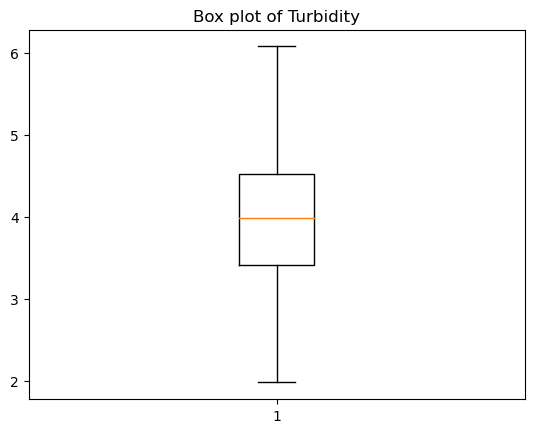

In [79]:
plt.boxplot(data['Turbidity'])
plt.title('Box plot of Turbidity')

Text(0.5, 1.0, ' Box plot of Potability')

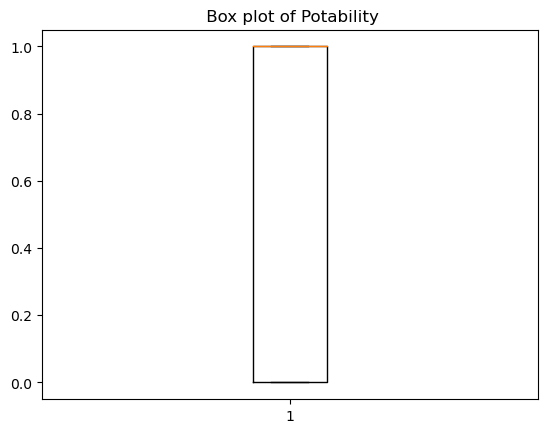

In [80]:
plt.boxplot(data['Potability'])
plt.title(' Box plot of Potability')

In [81]:
q1 = np.percentile(data['Potability'],25,
                   interpolation='midpoint')
q2 = np.percentile(data['Potability'],50,
                   interpolation='midpoint')
q3 = np.percentile(data['Potability'],75,
                   interpolation='midpoint')
iqr = q3-q1
low_limit = q1-1.5*iqr
up_limit = q3+1.5*iqr
print(low_limit)
print(up_limit)

-1.5
2.5


C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\621316482.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(data['Potability'],25,
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\621316482.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q2 = np.percentile(data['Potability'],50,
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_18528\621316482.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' ar

In [82]:
outlier = []
for x in data['Potability']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)
outlier


[]

In [83]:
ind1 = data['Potability']>up_limit
data.loc[ind1].index

Int64Index([], dtype='int64')

In [84]:
data.drop([],inplace = True)

Text(0.5, 1.0, 'Box plot of Potability')

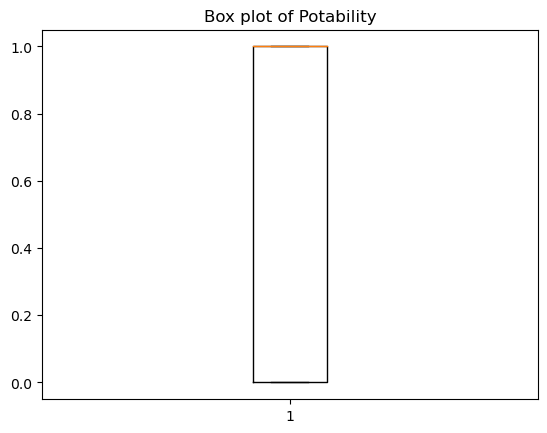

In [85]:
plt.boxplot(data['Potability'])
plt.title('Box plot of Potability')

In [86]:
data.shape

(228, 10)

In [87]:
data=pd.get_dummies(data)
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
8,7.036752,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
12,7.119824,156.704993,18730.813653,3.606036,282.344050,347.715027,15.929536,79.500778,3.445756,0
51,7.809632,100.457615,12013.550629,5.212315,247.200826,605.220124,9.611349,66.084174,2.447444,0
70,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891,0
84,6.395359,133.834229,23827.275015,5.127747,266.908428,573.400295,9.833875,95.026609,4.191218,0


In [88]:
data.columns
y=data['Potability']
x=data.drop('Potability',axis=1)



In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=42,test_size=0.2)

In [90]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)

In [91]:
from sklearn.metrics import mean_squared_error
print('MSE IS :',mean_squared_error(y_test,prediction))

MSE IS : 0.1965935943168177


In [92]:
from sklearn.metrics import r2_score
print('R squared value is :', r2_score(y_test,prediction))

R squared value is : 0.200015296972334


In [93]:
x.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,6.969085,200.258715,25132.453852,6.911544,261.035480,428.755925,13.817708,67.038971,3.965067
std,1.260193,38.046153,10726.019137,1.896455,21.178379,79.463753,3.191648,14.798778,0.796367
min,2.569244,100.457615,4304.492483,0.352000,129.000000,252.968328,2.200000,8.577013,1.984615
25%,6.317047,174.207722,16349.348493,5.682732,252.200729,370.039665,11.837045,57.769705,3.420769
50%,7.036752,203.568956,24328.436243,6.891802,266.721253,432.550596,13.798094,67.419341,3.987538
75%,7.697701,227.558470,31148.869440,8.193620,276.315299,487.696382,15.989026,77.174876,4.527220
max,9.917092,275.746716,56488.672413,11.078872,282.859453,620.346840,22.091990,101.615346,6.083772


In [94]:
type(x)

pandas.core.frame.DataFrame

In [95]:
from sklearn import preprocessing
standards=preprocessing.StandardScaler()
x=standards.fit_transform(x)


In [96]:
df=pd.DataFrame(x)
df.describe()

,0,1,2,3,4,5,6,7,8
count,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02
mean,-6.778204e-16,5.142086e-16,-4.051340e-16,-3.895519e-16,4.362982e-16,6.018577e-16,-3.895519e-18,5.453727e-17,4.207161e-16
std,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00
min,-3.499086e+00,-2.628930e+00,-1.946089e+00,-3.466455e+00,-6.248164e+00,-2.217041e+00,-3.648044e+00,-3.959150e+00,-2.492329e+00
25%,-5.185505e-01,-6.862273e-01,-8.206614e-01,-6.493775e-01,-4.180768e-01,-7.405320e-01,-6.219424e-01,-6.277316e-01,-6.849799e-01
50%,5.381362e-02,8.719737e-02,-7.512448e-02,-1.043254e-02,2.690614e-01,4.785856e-02,-6.159033e-03,2.575933e-02,2.827961e-02
75%,5.794500e-01,7.191219e-01,5.621520e-01,6.775260e-01,7.230694e-01,7.433595e-01,6.818093e-01,6.864219e-01,7.074499e-01
max,2.344477e+00,1.988482e+00,2.929811e+00,2.202266e+00,1.032751e+00,2.416353e+00,2.598184e+00,2.341575e+00,2.666316e+00


In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
print('MSE Is:',mean_squared_error(y_test,prediction))
print('R squared value is :',r2_score(y_test,prediction))


MSE Is: 0.1965935943168177
R squared value is : 0.200015296972334


In [98]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,0.598793,0.569351,0.399124,0.611506,0.858156,0.478492,0.584040,0.628364,0.483136
std,0.171505,0.217048,0.205542,0.176795,0.137648,0.216299,0.160449,0.159061,0.194276
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.510054,0.420734,0.230814,0.496951,0.800736,0.318667,0.484469,0.528736,0.350353
50%,0.608002,0.588236,0.383717,0.609665,0.895111,0.488821,0.583053,0.632453,0.488618
75%,0.697954,0.725093,0.514416,0.731026,0.957467,0.638927,0.693195,0.737308,0.620275
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

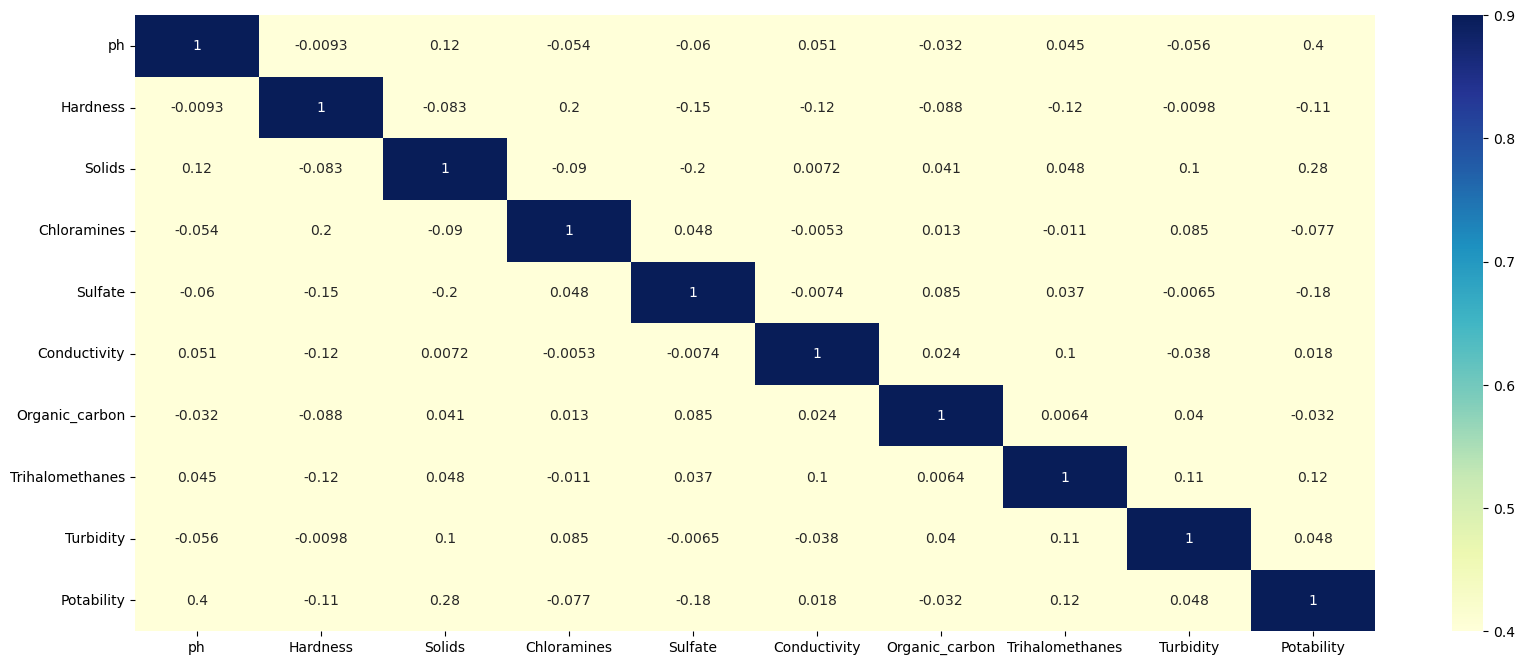

In [99]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,cmap='YlGnBu')